In [21]:
from astropy.io.fits import getdata
import numpy as np
from matplotlib import pyplot as plt
from astropy.modeling import models, fitting

In [66]:
g = models.Gaussian1D()
    


<Gaussian1D(amplitude=1., mean=0., stddev=1.)>

array([[1.5009972e-05, 5.0033239e-05, 1.1174090e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5436750e-05, 7.0322967e-05, 1.4922192e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9364443e-05, 6.3374544e-05, 1.4963433e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.5186197e-03,
        4.4816518e-03, 4.1005979e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.3394719e-03,
        4.3821274e-03, 4.0949145e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.4020331e-03,
        4.5271558e-03, 4.4987188e-03]], dtype=float32)

In [67]:


def bgd_model(en, params, rmf=False):
    gauss = models.Gaussian1D()

    model = np.zeros_like(en)
    for g in range(3):
        amp = g*3
        cent = g*3 + 1
        width = g*3 + 2
        model += gauss.evaluate(en, amp, cent, width)

    if rmf is False:
        rmf_data = getdata('det0A.rmf')
        rmf = rmf_data['MATRIX']


    fold_model = np.matmul(model, rmf)
    return model


    

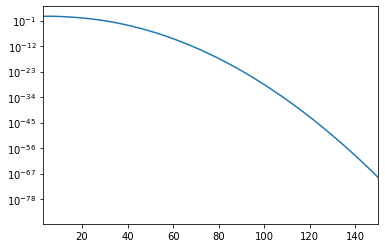

In [76]:
line_pars = [4466, 144, 0.01, 1317, 124.3, 1e-4, 812, 105.9, 0.01]
model = bgd_model(en, *line_pars)

plt.plot(en, model)


plt.xlim(3, 150)
plt.yscale('Log')
plt.show()

In [25]:
channels = np.arange(4096)
model = np.zeros(4096)

po = models.PowerLaw1D(amplitude = 1.0, x_0=1, alpha = 1.4)


In [54]:
ampl = 1.0
x_0 = 1.
alpha = 1.4
en = channels * 0.04 + 1.6

model = po.evaluate(en, ampl, x_0, alpha)
folded = np.matmul(model, rmf)


ValueError: x and y must have same first dimension, but have shapes (4096,) and (1,)

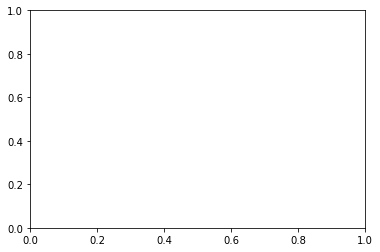

In [74]:
plt.plot(en, bgd_model)


plt.xlim(3, 150)
plt.ylim(1e-5, 1)
plt.yscale('Log')
plt.show()

(4096, 4096)